### The aim of this project is to perform data analysis on this [games dataset](https://www.kaggle.com/khaiid/most-selling-pc-games) and answer these questions:

* Which genre is the most popular ?
* Which publisher published most of the games ?
* Which developer developed most of the games ?
* Which series is the most popular ? 

In [95]:
#Import Libraries
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load and read data
df = pd.read_csv('Games.csv')
df.head()

,Name,Sales,Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [3]:
# Change Sales column name to Sales (Millions)
df_copy = df.copy()
df_copy.rename(columns={'Sales':'Sales (Millions)'}, inplace=True)
df_copy.head()

,Name,Sales (Millions),Series,Release,Genre,Developer,Publisher
0,PlayerUnknown's Battlegrounds,42.0,NaN,Dec-17,Battle royale,PUBG Studios,Krafton
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment
3,Garry's Mod,20.0,NaN,Nov-06,Sandbox,Facepunch Studios,Valve
4,Terraria,17.2,NaN,May-11,Action-adventure,Re-Logic,Re-Logic


In [4]:
df_copy.tail()

,Name,Sales (Millions),Series,Release,Genre,Developer,Publisher
170,Vietcong,1.0,Vietcong,Mar-03,Tactical shooter,Pterodon,Gathering of Developers
171,Warhammer Online: Age of Reckoning,1.0,Warhammer,Sep-08,MMORPG,Mythic Entertainment,Electronic Arts
172,Who Wants to Be a Millionaire?,1.0,NaN,Nov-99,Trivia game,Jellyvision,Disney Interactive Studios
173,Wing Commander 3: Heart of the Tiger,1.0,Wing Commander,Dec-94,Space combat simulation,Origin Systems,Electronic Arts
174,Zoo Tycoon,1.0,Zoo Tycoon,Oct-01,Business simulation,Microsoft,Blue Fang Games


In [6]:
# Display number of rows and columns
print('The dataset has {} rows and {} columns.'.format(df_copy.shape[0], df_copy.shape[1]))

The dataset has 175 rows and 7 columns.


In [10]:
# Get statistical overview of data
df_copy.describe()

,Sales (Millions)
count,175.000000
mean,3.141143
std,4.960513
min,1.000000
25%,1.000000
50%,1.500000
75%,3.000000
max,42.000000


In [11]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              175 non-null    object 
 1   Sales (Millions)  175 non-null    float64
 2   Series            139 non-null    object 
 3   Release           175 non-null    object 
 4   Genre             175 non-null    object 
 5   Developer         175 non-null    object 
 6   Publisher         175 non-null    object 
dtypes: float64(1), object(6)
memory usage: 9.7+ KB


###### The Series column has missing values.

In [17]:
df_copy.isnull().sum()

Name                 0
Sales (Millions)     0
Series              36
Release              0
Genre                0
Developer            0
Publisher            0
dtype: int64

In [18]:
# Percentage of missing values 
per_missing = round((df_copy.isnull().sum() / len(df_copy)) *100, 2)
per_missing

Name                 0.00
Sales (Millions)     0.00
Series              20.57
Release              0.00
Genre                0.00
Developer            0.00
Publisher            0.00
dtype: float64

In [20]:
# Drop rows with missing values
df_copy.dropna(inplace=True)
df_copy.isnull().any()

Name                False
Sales (Millions)    False
Series              False
Release             False
Genre               False
Developer           False
Publisher           False
dtype: bool

In [21]:
len(df_copy)

139

###### 20.5% of the data was dropped. 

### 1. Which genre is the most popular ?

In [22]:
df_copy.columns

Index(['Name', 'Sales (Millions)', 'Series', 'Release', 'Genre', 'Developer',
       'Publisher'],
      dtype='object')

In [31]:
df_copy['Genre'].value_counts().head()

Real-time strategy      23
First-person shooter    18
Action role-playing     11
Role-playing game        7
MMORPG                   6
Name: Genre, dtype: int64

In [47]:
df_copy[df_copy['Sales (Millions)'].max() == df_copy['Sales (Millions)']]['Genre']

1    Sandbox, survival
Name: Genre, dtype: object

###### Real-time strategy is the most popular Gaming genre. 

<AxesSubplot:>

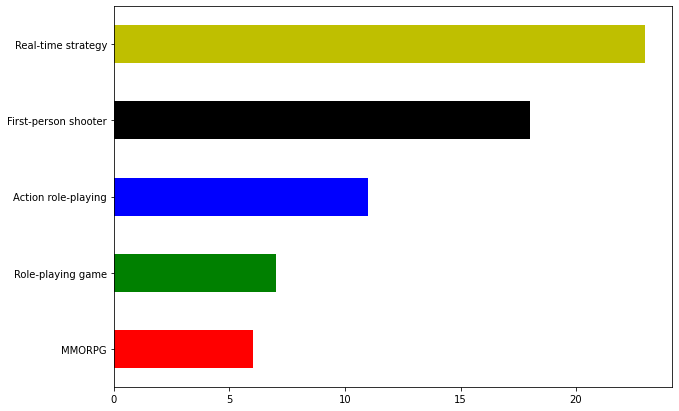

In [66]:
# Visualize most popular gaming genre
plt.figure(figsize = (10,7))
df_copy.Genre.value_counts().head().sort_values().plot(kind = 'barh', color = list('rgbkymc'))

### 2. Which publisher published most of the games ?

In [45]:
df_copy['Publisher'].value_counts().head(1)

Electronic Arts    19
Name: Publisher, dtype: int64

In [46]:
print('Electronic Arts (EA) published 19 games')

Electronic Arts (EA)published 19 games


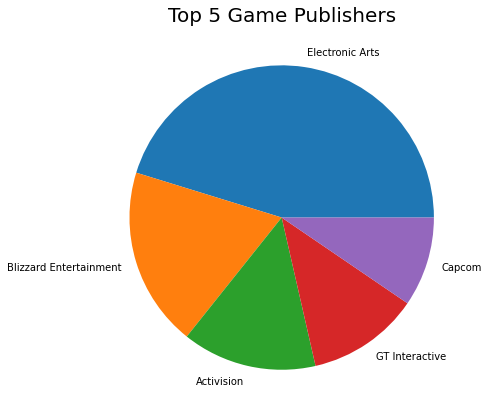

In [63]:
plt.figure(figsize = (15,7))
df_copy.Publisher.value_counts().iloc[:5].plot(kind='pie', ylabel='')
plt.title("Top 5 Game Publishers", fontsize=(20))
plt.show()

### 3. Which developer developed most of the games ?

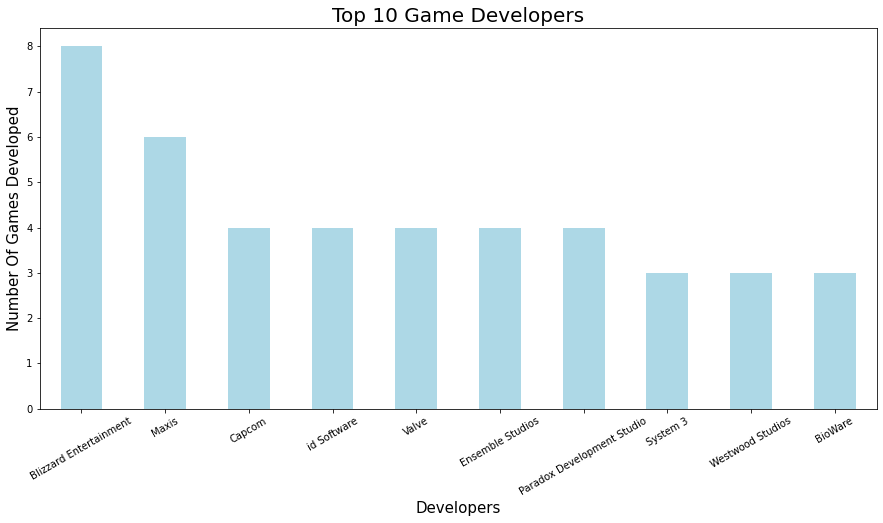

In [64]:
plt.figure(figsize = (15,7))
df_copy.Developer.value_counts().iloc[:10].plot(kind='bar', color=('lightblue'))
plt.title("Top 10 Game Developers", fontsize=(20))
plt.ylabel("Number Of Games Developed", fontsize=(15))
plt.xlabel("Developers", fontsize=(15))
plt.xticks(rotation=30)
plt.show()

### 4. Which series is the most popular ?

In [67]:
df_copy['Series'].value_counts().head(1)

Command & Conquer    5
Name: Series, dtype: int64

###### Command & Conquer is the most popular series.

In [100]:
# Convert Release date to pandas Datetime
df_copy['Datetime'] = pd.to_datetime(df_copy.Release,format='%b-%y')
df_copy.head()

,Name,Sales (Millions),Series,Release,Genre,Developer,Publisher,Datetime,Year
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,2011-11-01,2011
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012-05-01,2012
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment,2004-11-01,2004
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital),2004-11-01,2004
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt,2015-05-01,2015


In [101]:
df_copy['Year'] = df_copy['Datetime'].dt.year
df_copy.head()

,Name,Sales (Millions),Series,Release,Genre,Developer,Publisher,Datetime,Year
1,Minecraft,33.0,Minecraft,Nov-11,"Sandbox, survival",Mojang Studios,Mojang Studios,2011-11-01,2011
2,Diablo III,20.0,Diablo,May-12,Action role-playing,Blizzard Entertainment,Blizzard Entertainment,2012-05-01,2012
5,World of Warcraft,14.0,Warcraft,Nov-04,MMORPG,Blizzard Entertainment,Blizzard Entertainment,2004-11-01,2004
6,Half-Life 2,12.0,Half-Life,Nov-04,First-person shooter,Valve,Valve (digital),2004-11-01,2004
7,The Witcher 3: Wild Hunt,12.0,The Witcher,May-15,Action role-playing,CD Projekt Red,CD Projekt,2015-05-01,2015


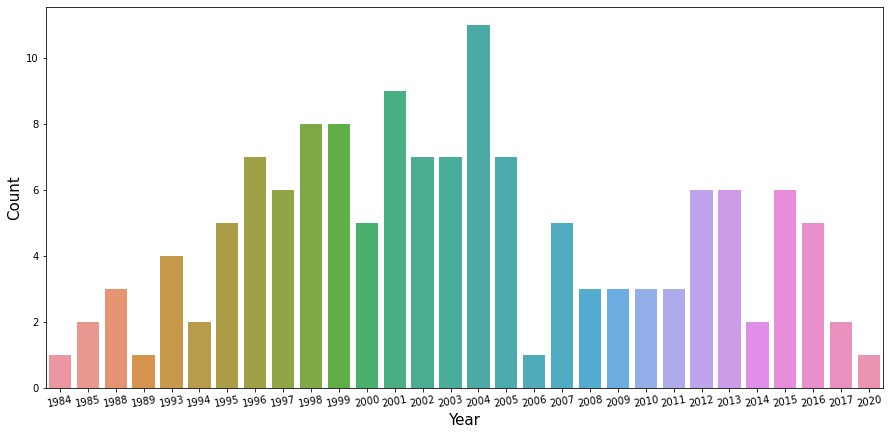

In [102]:
plt.figure(figsize=(15,7))
sns.countplot('Year', data=df_copy)
plt.xlabel('Year', fontsize=(15))
plt.ylabel('Count', fontsize=(15))
plt.xticks(rotation=10)
plt.show()